In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.simplefilter("ignore")

In [10]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [11]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [13]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [14]:
df.shape

(29020, 18)

In [15]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(7661)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(21359, 18)

In [19]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [20]:
## checking the columns value counts
df["no_of_adults"].value_counts()
df["no_of_children"].value_counts()
df["no_of_weekend_nights"].value_counts()
df["type_of_meal_plan"].value_counts()
df["required_car_parking_space"].value_counts()
df["room_type_reserved"].value_counts()
df["arrival_year"].value_counts()
df["market_segment_type"].value_counts()
## check for more
df["booking_status"].value_counts() ## here data is imbalanced as we have many rows for not canceled and few for canceled

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

Our Data is Imbalanced

In [21]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date']

In [22]:
## lets check if we are not missing any columns
len(cat_cols)

6

In [23]:
len(num_cols)
## 18 thats fine

12

# Data Analysis

In [ ]:
data = df.copy() ## so that our main dataFrame do not get affected

In [25]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


## Univariate Analysis

In [26]:
## we will be doing univariate analysis of all the numerical columns

def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes =[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    plt.tight_layout()
    plt.show()
        

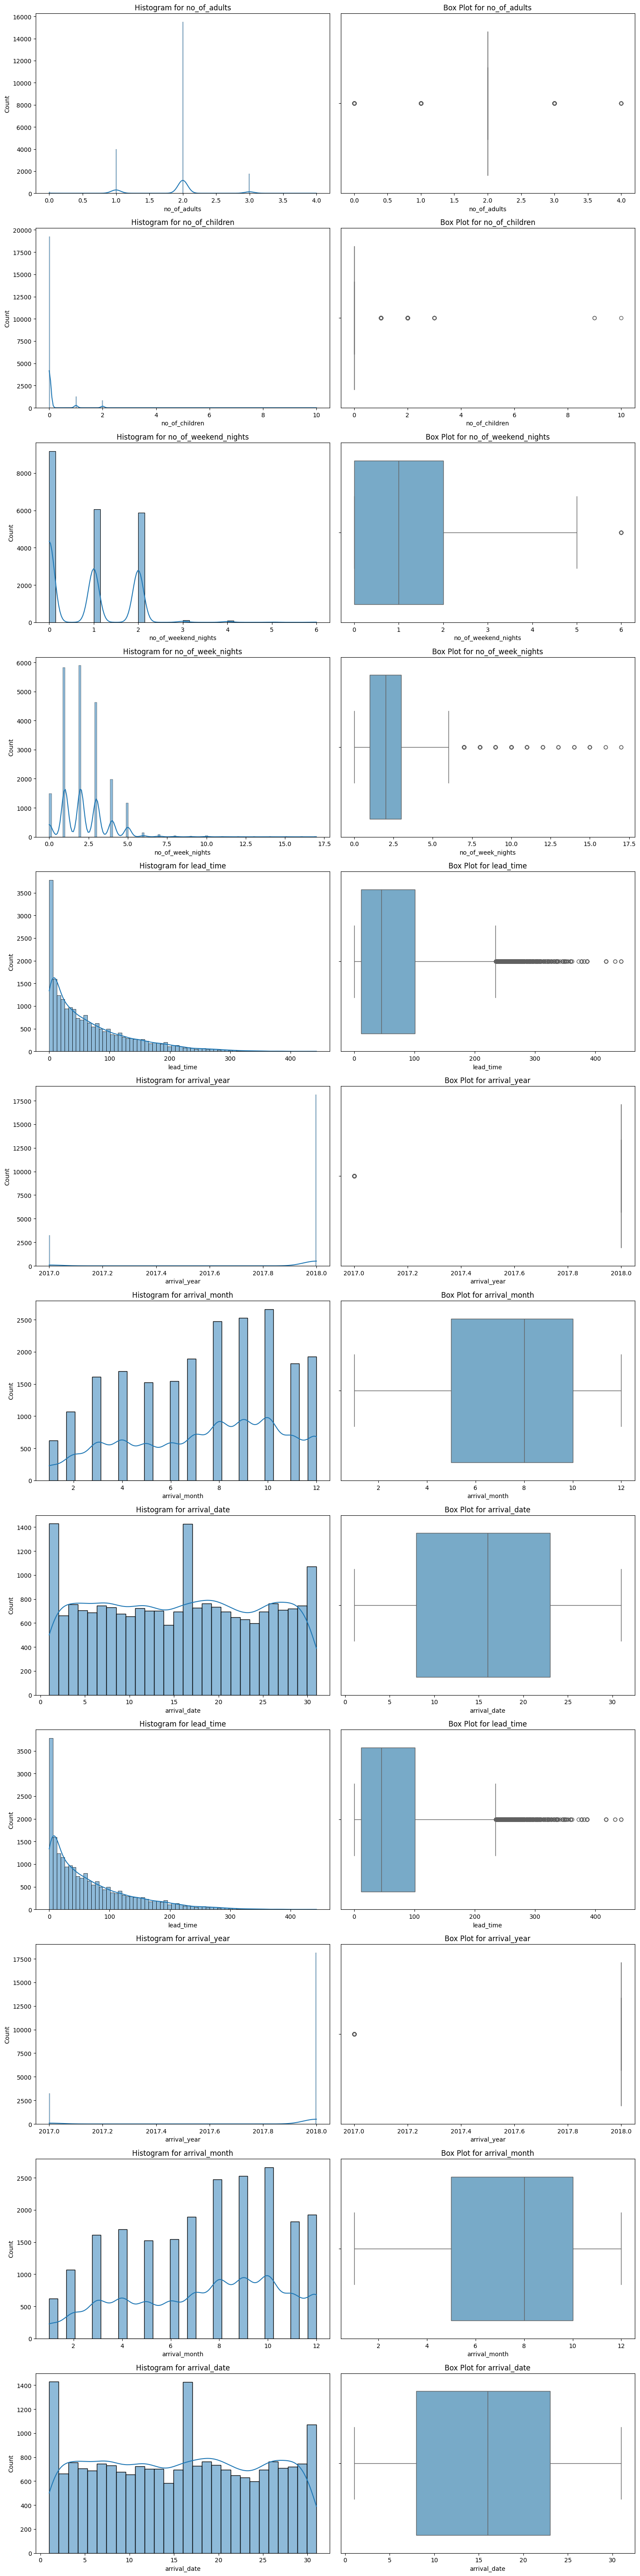

In [27]:
num_plot_dist(data, num_cols)

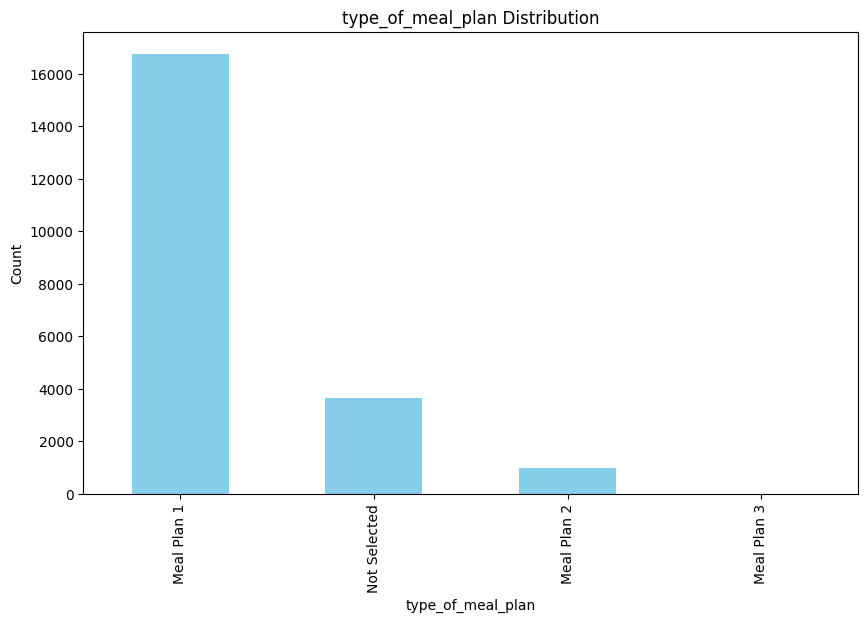

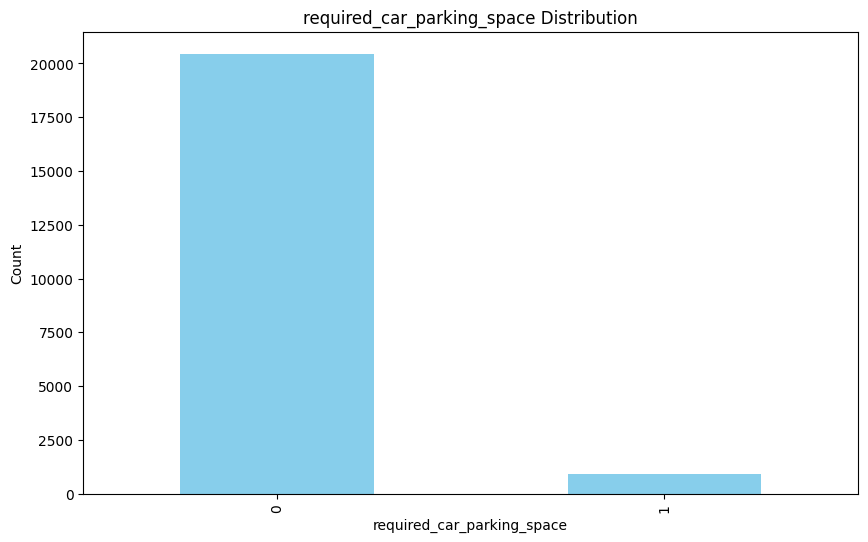

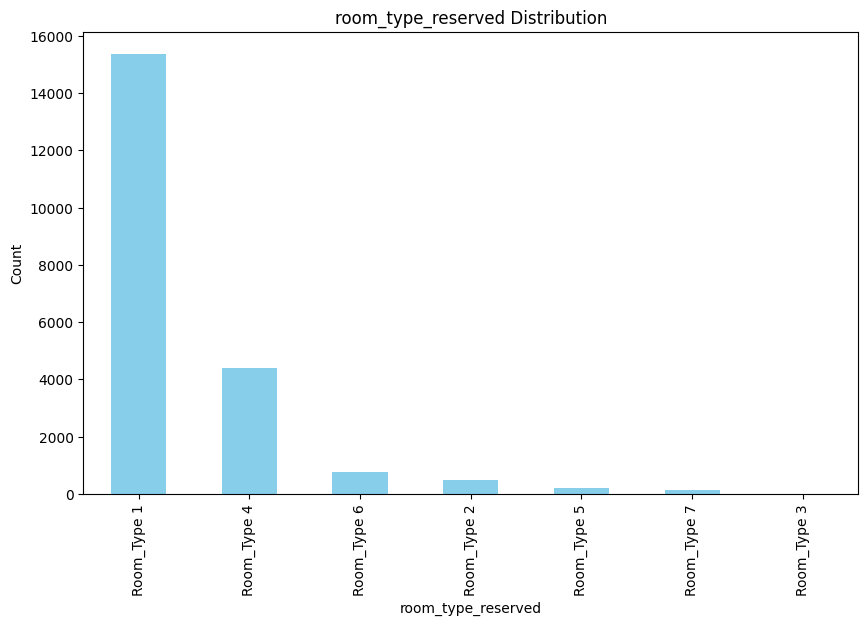

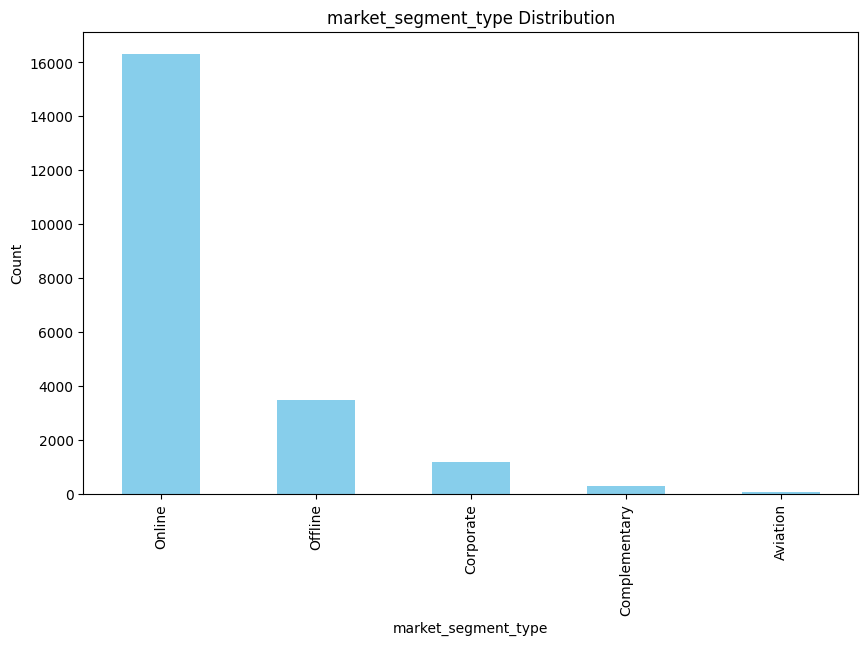

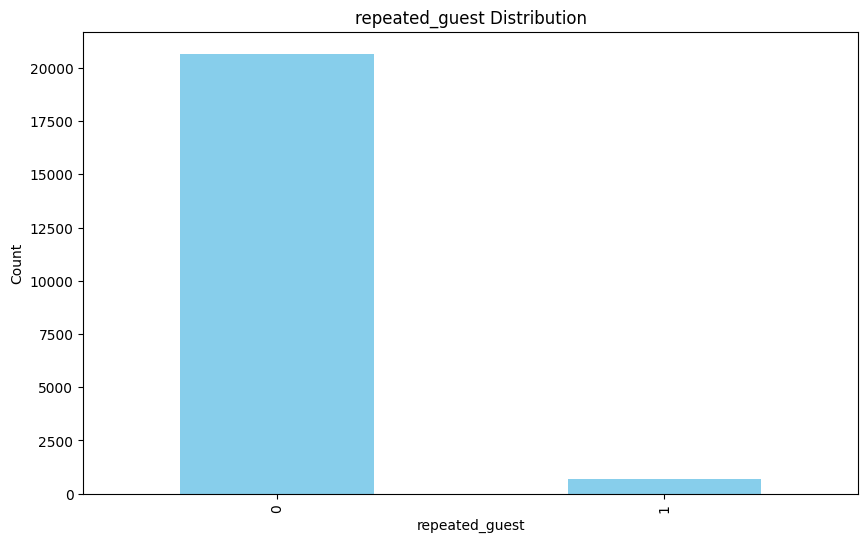

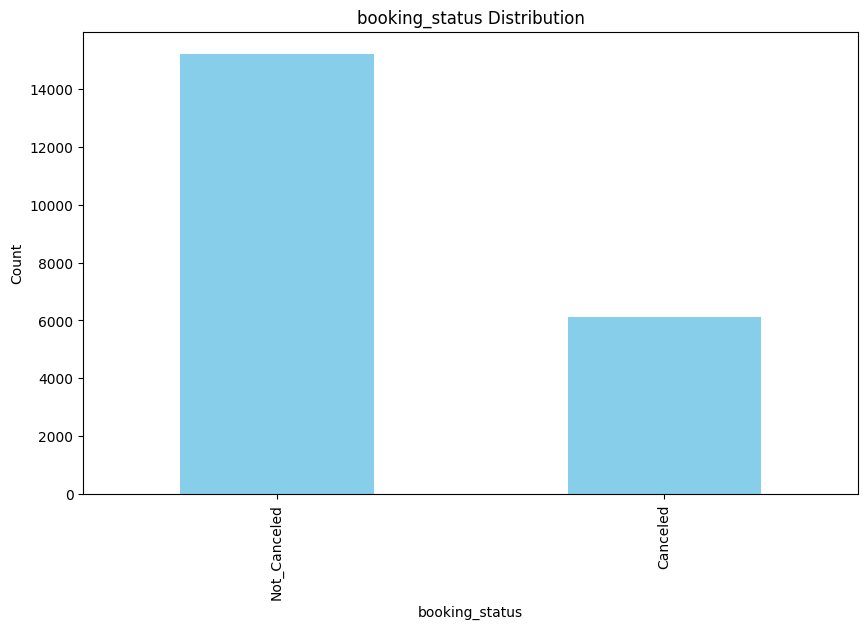

In [28]:
## now we will do univariate analysis for cat_cols

for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind="bar", color="skyblue")
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

## Bivaraite Analysis

In [ ]:
##we will be using two columns for analysis 
## bivariate analysis for numerical features

def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")
    plt.tight_layout()
    plt.show()

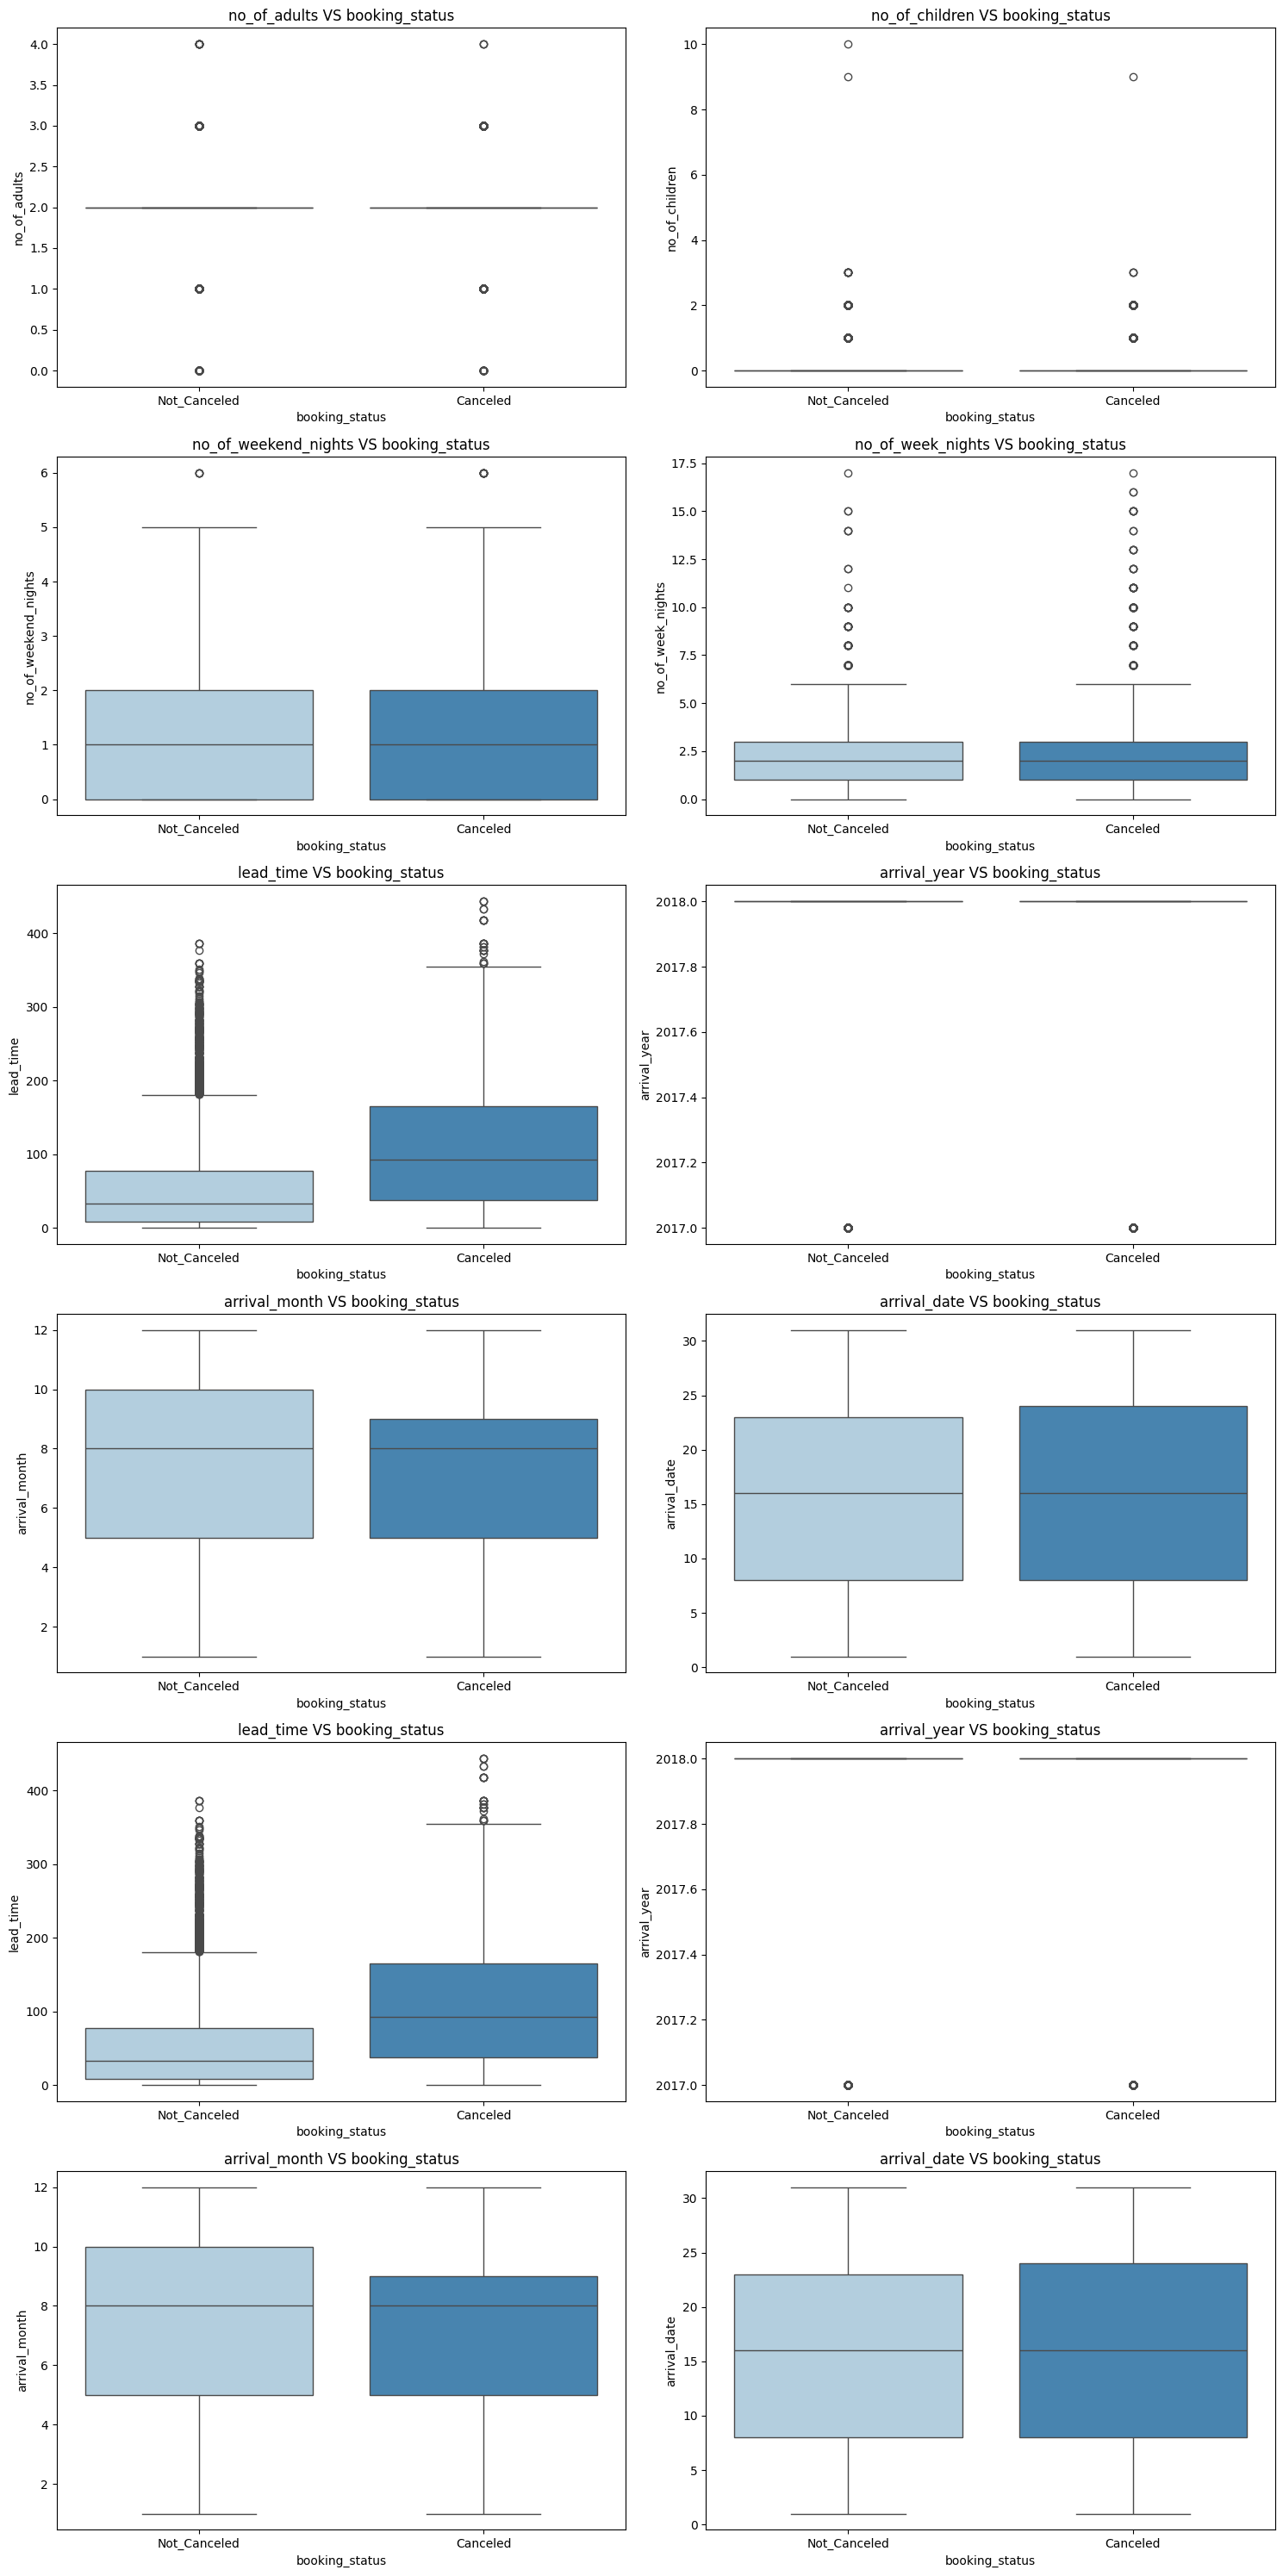

In [38]:
plot_bivariate_num(data, 'booking_status', num_cols)

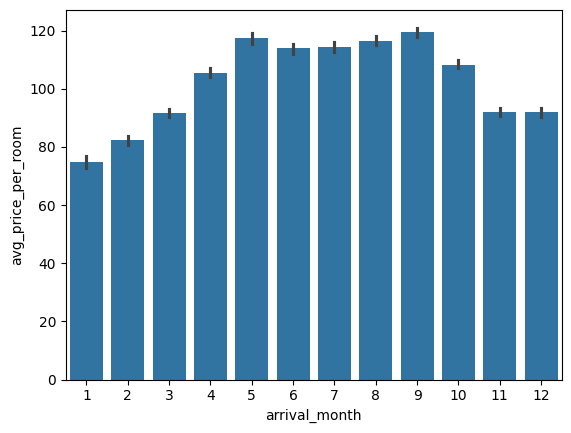

In [39]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [44]:
## bivariate analysis for cat_cols

def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()
    
    for i, feature in enumerate(cat_features):
        ## we will be using countplot for plotting categorical features
        ## countplot is only used for univariate analysis, so make it available for bivariate also we use hue
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax= axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        ## we will rotate the tick_params so that they do not collide
        axes[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

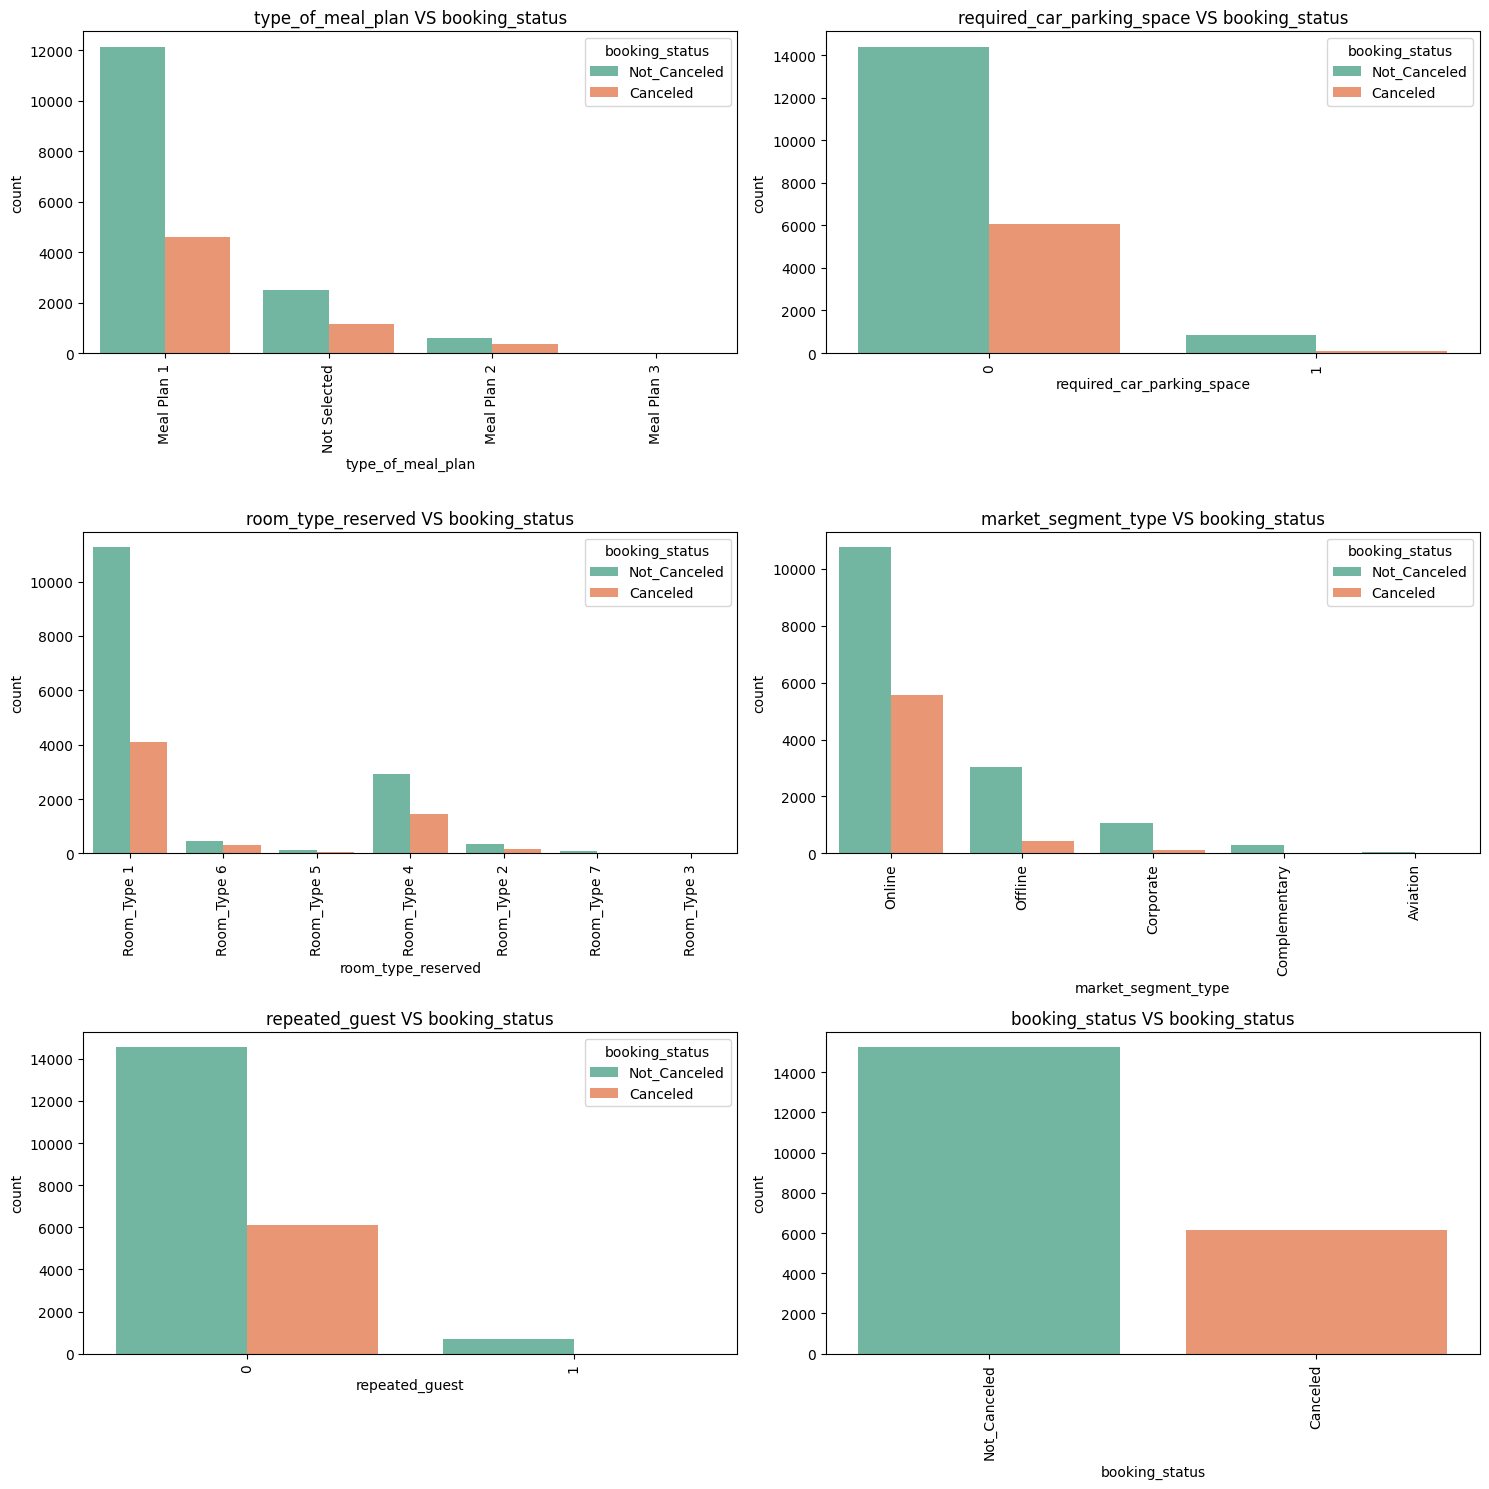

In [45]:
plot_bivariate_cat(data, 'booking_status', cat_cols)